In [163]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from sympy import symbols, diff, sin, cos, log, factorial, sqrt, tan, coth, latex

In [177]:
class TaylorSeries:
    def __init__(self, func, point, order):
        self.func = func
        self.point = point
        self.order = order
        self.derivatives = self.__calc_derivatives()
        self.coefficients = self.__calc_coefficients()

    def __calc_derivatives(self):
        x = symbols("x")
        df = diff(self.func, x)
        derivatives = [df]

        for i in range(self.order - 1):
            derivatives.append(diff(derivatives[-1], x))

        return derivatives

    def __calc_coefficients(self):
        coefficients = [
            df.subs(x, self.point).evalf() / np.math.factorial(i + 1)
            for i, df in enumerate(self.derivatives)
        ]

        return coefficients
    
    def print_polynomial(self, n, raw=False):
        a = symbols("a")
        f = latex(self.func.subs(x, a))
        for i in range(1, n):
            f += " + " + latex(self.derivatives[i-1] / symbols(f"{i}!")) + f"\\left(x - a\\right)^{{{i}}}"
        if raw:
            return f
        display(Math(f))

    
    def __call__(self, x_ax, n):
        # first term is the value of the function at the point
        # second term is the sum of the coefficients multiplied by the powers of (x - point)
        return self.func.subs(x, self.point).evalf() + sum(
            [c * (x_ax - self.point) ** i for i, c in enumerate(self.coefficients[:n], 1)]
        )


In [180]:
x = symbols("x")
func = log(x)
a = 1
n = 5
step = n // 5 # plot max 5 polynomials

taylor = TaylorSeries(func, a, n)


In [166]:
func

log(x)

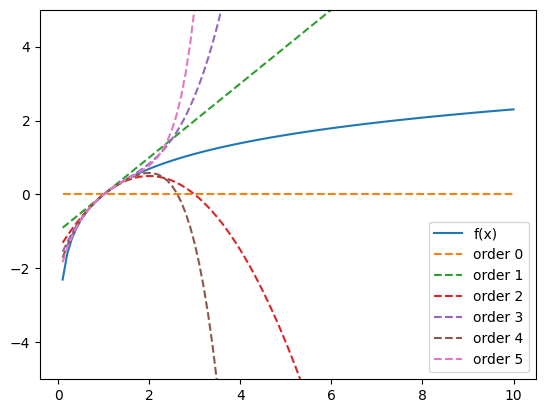

In [167]:
# plot the function and the taylor series
x_ax = np.linspace(0.1, 10, 100)

plt.plot(x_ax, [func.subs(x, point) for point in x_ax], label="f(x)")
for i in range(0, n + 1, step):
    plt.plot(x_ax, [taylor(x, i) for x in x_ax], label=f"order {i}", linestyle="--")
plt.legend()
plt.ylim(-5, 5)
plt.show()


In [182]:
taylor.print_polynomial(n, raw=False)

<IPython.core.display.Math object>

In [169]:
print(latex(taylor.derivatives[0].subs(x, symbols("a")) / factorial(1)))

\frac{1}{a}


In [170]:
f = func
for i in range(4, 0, -1):
   f += taylor.derivatives[i] / symbols(f"{i}!") * (symbols("x") - symbols("a")) ** i 

f

log(x) + 24*(-a + x)**4/(4!*x**5) - 6*(-a + x)**3/(3!*x**4) + 2*(-a + x)**2/(2!*x**3) - (-a + x)/(1!*x**2)

In [171]:
f = latex(func)
for i in range(1, 5):
   f += " + " + latex(taylor.derivatives[i-1] / symbols(f"{i}!")) + f"\\left(x - a\\right)^{{{i}}}"
# f
display(Math(f))

<IPython.core.display.Math object>

In [172]:
taylor.derivatives

[1/x, -1/x**2, 2/x**3, -6/x**4, 24/x**5]